<p style="text-align: right">
  <img src="../images/dtlogo.png" alt="Logo" width="200">
</p>

# 💻 02 - Stereo Calibration

Stereo Calibration is 

1. Steps

The stereo calibration for the OAK-D works the same as the Duckietown camera calibration


$$x_{t+1} = f(x_t, x_{t-1}, \dots, x_0; u_t, \dots, u_0) = f(x_t; u_t)$$


2. A (Minimal) sufficient statistic for the task (i.e., it contains only the information that we need to solve the task)
3. Permits efficient computation
4. Generalizable

An example of state often used in robotics is *pose*. A *pose* represents the location of the robot in the world as well as its orientation (i.e., what direction is the robot facing towards). Since we live in a 3-dimensional (3d) world, we represent the location of the robot as its $(x,y,z)$ coordinate in the world. We can represent orientation in terms of its roll, pitch, and yaw angles (also known as Euler angle representation). For example, the yaw angle $\theta_{yaw}$ will be the angle difference between the longitudinal axis of the robot from the reference frame.

<figure>
  <div style="text-align:center;">
  <img src="../images/representations/roll_pitch_yaw.png">
  <figcaption>Illustration of roll, pitch, and yaw (source: https://en.wikipedia.org/wiki/Aircraft_principal_axes).</figcaption>
  </div>
</figure>

Note that the location and the orientation of the robot can be defined either in the global coordinate frame (i.e., relative to where the origin is) or relative to any other coordinate frames. Combining location and orientation, we can write the pose $q$ in a vector/matrix form:

$$
q = 
\begin{bmatrix}
x & y & z & \theta_{roll} & \theta_{pitch} & \theta_{yaw}
\end{bmatrix}
$$

The pose $q$ can also be represented in the form of homogeneous transformation matrix, i.e., the **S**pecial **E**uclidean group $SE(3)$:

$$
SE(3) = \{T = 
\begin{bmatrix}
R & r \\
0^T & 1
\end{bmatrix}
\in \mathrm{R}^{4 \times 4} | C \in SO(3), r \in \mathrm{R}^{3}
\},
$$

where $R$ denotes the rotation matrix, and $r$ denotes the translation component. This matrix $T$ also has a nice property where 

$$
T^{-1} = 
\begin{bmatrix}
R^T & -R^Tr \\
0 & 1
\end{bmatrix}
$$

One of the reasons to represent the pose in this form is because it allows us to conveniently move between frames (see later in this activity). 

Although we have been discussing the pose in $SE(3)$, since we are using a mobile robot and we assume the world is flat, we can simplify the pose of our robot to only its $(x,y)$ coordinate and its yaw (or orientation) angle $\theta$. This is because, in addition to the assumption that the robot is always located at a constant elevation, we can also safely assume roll and pitch angles to always be constant since the robot always touches the ground. So in this case, the pose is simply $
q = 
\begin{bmatrix}
x & y & \theta
\end{bmatrix}
$, which we can also write in $SE(2)$:

$$
SE(2) = \{T = 
\begin{bmatrix}
R & r \\
0^T & 1
\end{bmatrix}
\in \mathrm{R}^{3 \times 3} | R \in SO(2), r \in \mathrm{R}^{2}
\},
$$

where

$$
\small
R = 
\begin{bmatrix}
\cos(\theta) & -\sin(\theta) \\
\sin(\theta) & \cos(\theta) \\
\end{bmatrix}
\ \ \ \
r = 
\begin{bmatrix}
x \\
y \\
\end{bmatrix}
$$

So, we have:

$$
T = 
\begin{bmatrix}
\cos(\theta) & -\sin(\theta) & x \\
\sin(\theta) & \cos(\theta) & y \\
0 & 0 & 1
\end{bmatrix}
$$

Let's first make sure that we understand how to represent a pose by doing the exercise below.

# 1 : Intrinsic calibration

**EXAMPLE: representing pose in $SE(n)$**

<figure>
  <div style="text-align:center;">
  <img src="../images/representations/pose_exercise.png">
  </div>
</figure>

**Question:**

The figure above illustrates the location of the robot (the orange dot) and its orientation, where the angle is measured from the $x$-axis (assume the angle to have a positive measure if the rotation is counterclockwise). How do we write the pose in $SE(2)$?

In [3]:
%matplotlib inline

import cv2
import matplotlib.pyplot as plt
import signal

def signal_handler(signal, frame):
    # KeyboardInterrupt detected, exiting
    global is_interrupted
    is_interrupted = True

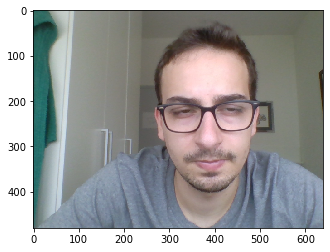

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [4]:
vc = cv2.VideoCapture(0)

plt.ion()

if vc.isOpened(): # try to get the first frame
    is_capturing, frame = vc.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)    # makes the blues image look real colored
    webcam_preview = plt.imshow(frame)    
else:
    is_capturing = False

signal.signal(signal.SIGINT, signal_handler)
is_interrupted = False
while is_capturing:
    is_capturing, frame = vc.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)    # makes the blues image look real colored
    webcam_preview.set_data(frame)
    plt.draw()

    try:    # Avoids a NotImplementedError caused by `plt.pause`
        plt.pause(0.05)
    except Exception:
        pass
    if is_interrupted:
        vc.release()
        break

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as  plt

In [ ]:
# TODO: type your answer here

p = np.array([
    [None, None, None],
    [None, None, None],
    [None, None, None]
])

print(p)

(You can find the solutions to this and other questions in the [solutions file](../01-Representations/SOLUTIONS-pose_representation.ipynb) in this folder. Give it a honest shot yourself before peeking!) 

# 1 : Stream stero images

Bla bla bla...

### Example

Plug the OAKD to your laptop...


In [5]:
#!/usr/bin/env python3

%matplotlib notebook
# first, import all necessary modules
from pathlib import Path

import blobconverter
import cv2
import depthai
import numpy as np

In [6]:

# Pipeline tells DepthAI what operations to perform when running - you define all of the resources used and flows here
pipeline = depthai.Pipeline()

# First, we want the Color camera as the output
cam_rgb = pipeline.createColorCamera()
cam_rgb.setPreviewSize(300, 300)  # 300x300 will be the preview frame size, available as 'preview' output of the node
cam_rgb.setInterleaved(False)

# Next, we want a neural network that will produce the detections
detection_nn = pipeline.createMobileNetDetectionNetwork()
# Blob is the Neural Network file, compiled for MyriadX. It contains both the definition and weights of the model
# We're using a blobconverter tool to retreive the MobileNetSSD blob automatically from OpenVINO Model Zoo
detection_nn.setBlobPath(str(blobconverter.from_zoo(name='mobilenet-ssd', shaves=6)))
# Next, we filter out the detections that are below a confidence threshold. Confidence can be anywhere between <0..1>
detection_nn.setConfidenceThreshold(0.5)
# Next, we link the camera 'preview' output to the neural network detection input, so that it can produce detections
cam_rgb.preview.link(detection_nn.input)

# XLinkOut is a "way out" from the device. Any data you want to transfer to host need to be send via XLink
xout_rgb = pipeline.createXLinkOut()
# For the rgb camera output, we want the XLink stream to be named "rgb"
xout_rgb.setStreamName("rgb")
# Linking camera preview to XLink input, so that the frames will be sent to host
cam_rgb.preview.link(xout_rgb.input)

# The same XLinkOut mechanism will be used to receive nn results
xout_nn = pipeline.createXLinkOut()
xout_nn.setStreamName("nn")
detection_nn.out.link(xout_nn.input)

# Pipeline is now finished, and we need to find an available device to run our pipeline
# we are using context manager here that will dispose the device after we stop using it
with depthai.Device(pipeline) as device:
    # From this point, the Device will be in "running" mode and will start sending data via XLink

    # To consume the device results, we get two output queues from the device, with stream names we assigned earlier
    q_rgb = device.getOutputQueue("rgb")
    q_nn = device.getOutputQueue("nn")

    # Here, some of the default values are defined. Frame will be an image from "rgb" stream, detections will contain nn results
    frame = None
    detections = []

    # Since the detections returned by nn have values from <0..1> range, they need to be multiplied by frame width/height to
    # receive the actual position of the bounding box on the image
    def frameNorm(frame, bbox):
        normVals = np.full(len(bbox), frame.shape[0])
        normVals[::2] = frame.shape[1]
        return (np.clip(np.array(bbox), 0, 1) * normVals).astype(int)


    # Main host-side application loop
    while True:
        # we try to fetch the data from nn/rgb queues. tryGet will return either the data packet or None if there isn't any
        in_rgb = q_rgb.tryGet()
        in_nn = q_nn.tryGet()

        if in_rgb is not None:
            # If the packet from RGB camera is present, we're retrieving the frame in OpenCV format using getCvFrame
            frame = in_rgb.getCvFrame()

        if in_nn is not None:
            # when data from nn is received, we take the detections array that contains mobilenet-ssd results
            detections = in_nn.detections

        if frame is not None:
            for detection in detections:
                # for each bounding box, we first normalize it to match the frame size
                bbox = frameNorm(frame, (detection.xmin, detection.ymin, detection.xmax, detection.ymax))
                # and then draw a rectangle on the frame to show the actual result
                cv2.rectangle(frame, (bbox[0], bbox[1]), (bbox[2], bbox[3]), (255, 0, 0), 2)
            # After all the drawing is finished, we show the frame on the screen
            cv2.imshow("preview", frame)

        # at any time, you can press "q" and exit the main loop, therefore exiting the program itself
        if cv2.waitKey(1) == ord('q'):
            break


[==================================================]
Done


RuntimeError: Failed to find device after booting, error message: X_LINK_DEVICE_NOT_FOUND

⚠️ ***WARNING:***
- DO NOT CHANGE THE ORDER OF THE FOLLOWING CODE CELLS
- DO NOT CHANGE THE NAME OF THE FOLLOWING FUNCTIONS
- DO NOT CHANGE THE ARGUMENTS OF THE FUNCTIONS
- DO NOT CREATE NEW CODE CELLS, THEY WILL NOT BE CONSIDERED

In [7]:
!roscore

... logging to /tmp/.ros/log/e2460568-d74a-11eb-8dca-0242ac110002/roslaunch-429c6e7e239a-2378.log
Checking log directory for disk usage. This may take a while.
Press Ctrl-C to interrupt
Done checking log file disk usage. Usage is <1GB.
]2;roscore
started roslaunch server http://172.17.0.2:43619/
ros_comm version 1.15.11


SUMMARY

PARAMETERS
 * /rosdistro: noetic
 * /rosversion: 1.15.11

NODES

auto-starting new master
process[master]: started with pid [2386]
ROS_MASTER_URI=http://172.17.0.2:11311/
]2;roscore http://172.17.0.2:11311/
setting /run_id to e2460568-d74a-11eb-8dca-0242ac110002
process[rosout-1]: started with pid [2404]
started core service [/rosout]
^C
[rosout-1] killing on exit


In [10]:
#!/usr/bin/env python3

import os
import sys
import time
import yaml
import copy
import rospy
import numpy as np
from threading import Thread

from sensor_msgs.msg import CompressedImage, Image, CameraInfo
from sensor_msgs.srv import SetCameraInfo, SetCameraInfoResponse

from duckietown.dtros import DTROS, NodeType, TopicType, DTParam, ParamType

import depthai as dai

USE_CV_BRIDGE = False



Creatirg the node

init the oakd module and topics...

In [11]:
# Do not change the nameing of the functions/classes

class OAKDCameraNode(DTROS):
    """Handles the imagery.

    The node handles the image stream, initializing it, publishing frames
    according to the required frequency and stops it at shutdown.

    Note that only one instance of this class should be used at a time.
    If another node tries to start an instance while this node is running,
    it will likely fail with an `Out of resource` exception.

    The configuration parameters can be changed dynamically while the node is running via
    `rosparam set` commands.

    Configuration:
        ~framerate (:obj:`float`): The camera image acquisition framerate, default is 20.0 fps
        ~res_w (:obj:`int`): The desired width of the acquired image, default is 640px
        ~res_h (:obj:`int`): The desired height of the acquired image, default is 480px

    Publisher:
        ~image/compressed (:obj:`CompressedImage`): The acquired camera images
        ~camera_info (:obj:`CameraInfo`): The camera parameters

    Service:
        ~set_camera_info:
            Saves a provided camera info
            to `/data/config/calibrations/camera_intrinsic/HOSTNAME.yaml`.

            input:
                camera_info (`CameraInfo`): The camera information to save

            outputs:
                success (`bool`): `True` if the call succeeded
                status_message (`str`): Used to give details about success

    """
    def __init__(self):
        # Initialize the DTROS parent class
        super(OAKDCameraNode, self).__init__(
            node_name='camera',
            node_type=NodeType.DRIVER,
            help="Camera driver for reading and publishing OAK-D images"
        )
        # Add the node parameters to the parameters dictionary and load their default values
        self._res_w = DTParam(
            '~res_w',
            param_type=ParamType.INT,
            default=640,
            help="Horizontal resolution (width) of the produced image frames."
        )
        self._res_h = DTParam(
            '~res_h',
            param_type=ParamType.INT,
            default=400,
            help="Vertical resolution (height) of the produced image frames."
        )
        self._framerate = DTParam(
            '~framerate',
            param_type=ParamType.INT,
            default=20,
            help="Framerate at which images frames are produced"
        )

        # define parameters
        self._framerate.register_update_callback(self.parameters_updated)
        self._res_w.register_update_callback(self.parameters_updated)
        self._res_h.register_update_callback(self.parameters_updated)

        # intrinsic calibration
        veh_name = rospy.get_namespace().rstrip('/')
        self.frame_ids = {
            'left': veh_name + '/camera_left_frame',
            'right': veh_name + '/camera_right_frame',
            'rgb': veh_name + '/camera_frame',
            'disparity': veh_name + '/camera_left_frame'  # disparity/depth are in left camera frame
        }
        self.cali_file_folder = '/data/config/calibrations/camera_intrinsic/oakd/'

        cali_files = {
            'left': self.cali_file_folder + veh_name + '_left.yaml',
            'right': self.cali_file_folder + veh_name + '_right.yaml',
            'rgb': self.cali_file_folder + veh_name + '.yaml'
        }

        for cam, cali_file in cali_files.items():
            # locate calibration yaml file or use the default otherwise
            if not os.path.isfile(cali_file):
                self.logwarn('Calibration not found: %s.\n Using default instead.' % cali_file)
                cali_files[cam] = None

        # load the calibration file
        self.original_camera_infos = dict()
        for cam, cali_file in cali_files.items():
            if cali_file is None:
                self.original_camera_infos[cam] = self.default_intrinsics(cam)
                cali_file = '(default)'
            else:
                self.original_camera_infos[cam] = self.load_camera_info(cali_file)
            self.log('For camera %s, using calibration file: %s' % (cam, cali_file))
            self.original_camera_infos[cam].header.frame_id = self.frame_ids[cam]

        self.current_camera_infos = copy.deepcopy(self.original_camera_infos)
        for cam in cali_files.keys():
            self.update_camera_params(cam)

        if USE_CV_BRIDGE:
            # create cv bridge
            self._bridge = CvBridge()

        # OAK-D interface
        self._pipeline = None
        self._cam_left = None
        self._cam_right = None
        self._cam_rgb = None
        self._disparity = None
        self._manip_rgb = None
        self._xout_left = None
        self._xout_right = None
        self._xout_manip_rgb = None
        self._xout_disparity = None
        self._device = None
        self._queue_left = None
        self._queue_right = None
        self._queue_rgb = None
        self._queue_disparity = None

        # Setup publishers
        self._is_stopped = False
        self._worker = None

        self.pub_images = {
            'left': rospy.Publisher(
                '~image_left/compressed',
                CompressedImage,
                queue_size=1,
                dt_topic_type=TopicType.DRIVER,
                dt_help='The stream of JPEG compressed images from OAK-D left camera'),
            'right': rospy.Publisher(
                '~image_right/compressed',
                CompressedImage,
                queue_size=1,
                dt_topic_type=TopicType.DRIVER,
                dt_help='The stream of JPEG compressed images from OAK-D right camera'),
            'rgb': rospy.Publisher(
                '~image/compressed',
                CompressedImage,
                queue_size=1,
                dt_topic_type=TopicType.DRIVER,
                dt_help='The stream of JPEG compressed images from OAK-D RGB camera'),
            'disparity': rospy.Publisher(
                '~image_disparity/compressed',
                CompressedImage,
                queue_size=1,
                dt_topic_type=TopicType.DRIVER,
                dt_help='Disparity image from OAK-D stereo'),
            'all': rospy.Publisher(
                '~all_images',
                OAKDImages,
                queue_size=1,
                dt_topic_type=TopicType.DRIVER,
                dt_help='All images (left, right, RGB, disparity) from OAK-D, synchronized')
        }

        self.pub_camera_infos = {
            'left': rospy.Publisher(
                '~left_camera_info',
                CameraInfo,
                queue_size=1,
                dt_topic_type=TopicType.DRIVER,
                dt_help='Left camera calibration information, the message content is fixed'),
            'right': rospy.Publisher(
                '~right_camera_info',
                CameraInfo,
                queue_size=1,
                dt_topic_type=TopicType.DRIVER,
                dt_help='Right camera calibration information, the message content is fixed'),
            'rgb': rospy.Publisher(
                '~camera_info',
                CameraInfo,
                queue_size=1,
                dt_topic_type=TopicType.DRIVER,
                dt_help='RGB camera calibration information, the message content is fixed')
        }

        # Setup service (for camera_calibration)
        self.srv_set_camera_infos = {
            'left': rospy.Service(
                '~set_left_camera_info',
                SetCameraInfo,
                self.srv_set_left_camera_info_cb),
            'right': rospy.Service(
                '~set_right_camera_info',
                SetCameraInfo,
                self.srv_set_right_camera_info_cb),
            'rgb': rospy.Service(
                '~camera_info',
                SetCameraInfo,
                self.srv_camera_info_cb)
        }
        # ---
        self.log('[OAKDCameraNode]: Initialized.')

    @property
    def is_stopped(self):
        return self._is_stopped

    def parameters_updated(self):
        self.stop()
        for cam in self.original_camera_infos.keys():
            self.update_camera_params(cam)
        self.start()

    def publish(self, image_msgs):
        # add time to messages
        stamp = rospy.Time.now()
        valid_msgs = set()

        for camera_name, image_msg in image_msgs.items():
            if type(image_msg) is not CompressedImage:
                continue

            valid_msgs.add(camera_name)
            image_msg.header.stamp = stamp
            # update camera frame
            image_msg.header.frame_id = self.frame_ids[camera_name]
            # publish image
            self.pub_images[camera_name].publish(image_msg)
            # Save modified image message
            image_msgs[camera_name] = image_msg
            # publish camera info
            if camera_name in ('left', 'right', 'rgb'):
                self.current_camera_infos[camera_name].header.stamp = stamp
                self.pub_camera_infos[camera_name].publish(
                    self.current_camera_infos[camera_name])

        if valid_msgs == set(['left', 'right', 'rgb', 'disparity']):
            # All images were successfully read
            all_images = OAKDImages()
            all_images.left_image = image_msgs['left']
            all_images.right_image = image_msgs['right']
            all_images.rgb_image = image_msgs['rgb']
            all_images.disparity_image = image_msgs['disparity']
            self.pub_images['all'].publish(all_images)

    def start(self):
        """
        Begins the camera capturing.
        """
        self.log('Start capturing.')
        # ---
        try:
            self.setup()
            # run camera thread
            self._worker = Thread(target=self.run)
            self._worker.start()
        except StopIteration:
            self.log('Exception thrown.')

    def stop(self):
        self.loginfo('Stopping OAK-D...')
        self._is_stopped = True
        # wait for the camera thread to finish
        if self._worker is not None:
            self._worker.join()
            time.sleep(2)
        self._worker = None
        # release resources
        self.release()
        time.sleep(2)
        self._is_stopped = False
        self.loginfo('OAK-D stopped.')

    def setup(self):
        if self._device is not None:
            # Close device if it was previously initialized
            self._device.close()
            time.sleep(2)

        ###### OAK-D Configuration ######

        # Start defining a pipeline
        self._pipeline = dai.Pipeline()

        # LEFT CAMERA
        self._cam_left = self._pipeline.createMonoCamera()
        self._cam_left.setBoardSocket(dai.CameraBoardSocket.LEFT)
        self._cam_left.setResolution(
            dai.MonoCameraProperties.SensorResolution.THE_400_P)

        # RIGHT CAMERA
        self._cam_right = self._pipeline.createMonoCamera()
        self._cam_right.setBoardSocket(dai.CameraBoardSocket.RIGHT)
        self._cam_right.setResolution(
            dai.MonoCameraProperties.SensorResolution.THE_400_P)

        # RGB CAMERA
        self._cam_rgb = self._pipeline.createColorCamera()
        self._cam_rgb.setBoardSocket(dai.CameraBoardSocket.RGB)
        self._cam_rgb.setResolution(
            dai.ColorCameraProperties.SensorResolution.THE_1080_P)
        self._cam_rgb.setColorOrder(
            dai.ColorCameraProperties.ColorOrder.RGB)
        self._cam_rgb.setInterleaved(False)
        self._cam_rgb.setPreviewSize(640, 400)

        # DISPARITY
        self._disparity = self._pipeline.createStereoDepth()
        self._disparity.setConfidenceThreshold(150)
        self._disparity.setMedianFilter(
            dai.StereoDepthProperties.MedianFilter.KERNEL_7x7)
        self._disparity.setLeftRightCheck(False)
        self._disparity.setExtendedDisparity(False)  # True = better for short-range
        self._disparity.setSubpixel(False)  # True = better for long-range
        # self._disparity.setDepthAlign(dai.CameraBoardSocket.LEFT)
        self._disparity.setRectifyMirrorFrame(False)

        # IMAGE MANIPULATION
        self._manip_rgb = self._pipeline.createImageManip()

        for manip in [self._manip_rgb]:
            manip.initialConfig.setResize(640, 400)
            manip.setWaitForConfigInput(False)
            manip.setKeepAspectRatio(True)

        # OUTPUT LINKS
        self._xout_left = self._pipeline.createXLinkOut()
        self._xout_right = self._pipeline.createXLinkOut()
        self._xout_manip_rgb = self._pipeline.createXLinkOut()
        self._xout_disparity = self._pipeline.createXLinkOut()

        self._xout_left.setStreamName('left_stream')
        self._xout_right.setStreamName('right_stream')
        self._xout_manip_rgb.setStreamName('rgb_stream')
        self._xout_disparity.setStreamName('disparity_stream')

        # Raw RGB image --> Image manipulation module
        self._cam_rgb.preview.link(self._manip_rgb.inputImage)
        # Disparity --> link the raw left & right images as input to stereo
        self._cam_left.out.link(self._disparity.left)
        self._cam_right.out.link(self._disparity.right)
        self._disparity.disparity.link(self._xout_disparity.input)
        self._disparity.rectifiedLeft.link(self._xout_left.input)
        self._disparity.rectifiedRight.link(self._xout_right.input)
        # Image manipulation module --> public outputs
        self._manip_rgb.out.link(self._xout_manip_rgb.input)

        # Pipeline is defined, now we can connect to the device
        self._device = dai.Device(self._pipeline, usb2Mode=False)
        self._device.setLogLevel(dai.LogLevel.DEBUG)

        # True specifies blocking and False overwriting of oldest messages
        self._queue_left = self._device.getOutputQueue(
            name='left_stream', maxSize=1, blocking=False)
        self._queue_right = self._device.getOutputQueue(
            name='right_stream', maxSize=1, blocking=False)
        self._queue_rgb = self._device.getOutputQueue(
            name='rgb_stream', maxSize=1, blocking=False)
        self._queue_disparity = self._device.getOutputQueue(
            name='disparity_stream', maxSize=1, blocking=False)

    def release(self):
        if self._device is not None:
            self.loginfo('Releasing depthai device...')
            try:
                self._device.close()
            except Exception:
                pass
            self.loginfo('depthai device released.')
        self._device = None

    def cv2jpeg_msg(self, cv_image, is_rgb):
        if USE_CV_BRIDGE:
            encoding = 'rgb8' if is_rgb else 'mono8'
            return self._bridge.cv2_to_compressed_imgmsg(
                cv_image, encoding=encoding, dst_format='jpeg')
        elif is_rgb:
            return rgb8_to_compressed_imgmsg(cv_image)
        else:
            return mono8_to_compressed_imgmsg(cv_image)

    def run(self):
        """ Image capture procedure.
            Captures images from OAK-D and publishes them
        """
        if (self._device is None) or (self._pipeline is None):
            self.logerr('Device was not initialized!')
            return

        # keep reading
        while (not self.is_stopped) and (not self.is_shutdown):
            msgs = {'left': None, 'right': None, 'rgb': None, 'disparity': None}

            if True: # self.image_left_pub.get_num_connections() > 0:
                left = self._queue_left.get()
                left = left.getCvFrame()
                msgs['left'] = self.cv2jpeg_msg(left, is_rgb=False)

            if True: # self.image_right_pub.get_num_connections() > 0:
                right = self._queue_right.get()
                right = right.getCvFrame()
                msgs['right'] = self.cv2jpeg_msg(right, is_rgb=False)

            if True: # self.image_rgb_pub.get_num_connections() > 0:
                rgb = self._queue_rgb.get()
                rgb = rgb.getCvFrame()
                msgs['rgb'] = self.cv2jpeg_msg(rgb, is_rgb=True)

            if True:
                disparity = self._queue_disparity.get()
                disparity = disparity.getFrame()
                msgs['disparity'] = self.cv2jpeg_msg(disparity, is_rgb=False)

            got = list(sorted([k for k, m in msgs.items() if m is not None]))
            if len(got) > 0:
              self.log('Got {} from OAK-D'.format(', '.join(got)))
              self.publish(msgs)
            else:
              self.log('No images were read from OAK-D!')

        self.loginfo('Camera worker stopped.')

    def on_shutdown(self):
        self.stop()

    def srv_set_left_camera_info_cb(self, req):
        self.log('[srv_set_left_camera_info_cb] Callback!')
        return self.srv_set_camera_info_cb(req, 'left')

    def srv_set_right_camera_info_cb(self, req):
        self.log('[srv_set_right_camera_info_cb] Callback!')
        return self.srv_set_camera_info_cb(req, 'right')

    def srv_camera_info_cb(self, req):
        self.log('[srv_camera_info_cb] Callback!')
        return self.srv_set_camera_info_cb(req, 'rgb')

    def srv_set_camera_info_cb(self, req, cam):
        filename = self.cali_file_folder + rospy.get_namespace().strip('/') + ('_%s.yaml' % cam)
        response = SetCameraInfoResponse()
        response.success = self.save_camera_info(req.camera_info, filename, cam)
        response.status_message = 'Wrote to %s' % filename
        return response

    def save_camera_info(self, camera_info_msg, filename, camera_name):
        """Saves intrinsic calibration to file.

            Args:
                camera_info_msg (:obj:`CameraInfo`): Camera Info containing calibration
                filename (:obj:`str`): filename where to save calibration
                camera_name (:obj:`str`): OAK-D camera name (left, right, rgb)
        """
        # Convert camera_info_msg and save to a yaml file
        self.log('[save_camera_info] filename: %s' % filename)

        # Converted from camera_info_manager.py
        calib = {
            'image_width': camera_info_msg.width,
            'image_height': camera_info_msg.height,
            'camera_name': rospy.get_name().lstrip('/').split('/')[0] + ('_%s' % camera_name),
            'distortion_model': camera_info_msg.distortion_model,
            'distortion_coefficients': {
                'data': camera_info_msg.D,
                'rows': 1,
                'cols': 5
            },
            'camera_matrix': {
                'data': camera_info_msg.K,
                'rows': 3,
                'cols': 3
            },
            'rectification_matrix': {
                'data': camera_info_msg.R,
                'rows': 3,
                'cols': 3
            },
            'projection_matrix': {
                'data': camera_info_msg.P,
                'rows': 3,
                'cols': 4
            }
        }
        self.log('[save_camera_info] calib %s' % calib)
        try:
            f = open(filename, 'w')
            yaml.safe_dump(calib, f)
            return True
        except IOError:
            return False

    def update_camera_params(self, camera_name):
        """ Update the camera parameters based on the current resolution.

        The camera matrix, rectification matrix, and projection matrix depend on
        the resolution of the image.
        As the calibration has been done at a specific resolution, these matrices need
        to be adjusted if a different resolution is being used.
        """
        original_info = self.original_camera_infos[camera_name]
        scale_width = float(self._res_w.value) / original_info.width
        scale_height = float(self._res_h.value) / original_info.height

        scale_matrix = np.ones(9)
        scale_matrix[0] *= scale_width
        scale_matrix[2] *= scale_width
        scale_matrix[4] *= scale_height
        scale_matrix[5] *= scale_height

        # adjust the camera matrix resolution
        self.current_camera_infos[camera_name].height = self._res_h.value
        self.current_camera_infos[camera_name].width = self._res_w.value

        # adjust the K matrix
        self.current_camera_infos[camera_name].K = np.array(original_info.K) * scale_matrix

        # adjust the P matrix
        scale_matrix = np.ones(12)
        scale_matrix[0] *= scale_width
        scale_matrix[2] *= scale_width
        scale_matrix[5] *= scale_height
        scale_matrix[6] *= scale_height
        self.current_camera_infos[camera_name].P = np.array(original_info.P) * scale_matrix

    @staticmethod
    def load_camera_info(filename):
        """Loads the camera calibration files.

        Loads the intrinsic and extrinsic camera matrices.

        Args:
            filename (:obj:`str`): filename of calibration files.

        Returns:
            :obj:`CameraInfo`: a CameraInfo message object

        """
        with open(filename, 'r') as stream:
            calib_data = yaml.safe_load(stream)
        cam_info = CameraInfo()
        cam_info.width = calib_data['image_width']
        cam_info.height = calib_data['image_height']
        cam_info.K = calib_data['camera_matrix']['data']
        cam_info.D = calib_data['distortion_coefficients']['data']
        cam_info.R = calib_data['rectification_matrix']['data']
        cam_info.P = calib_data['projection_matrix']['data']
        cam_info.distortion_model = calib_data['distortion_model']
        return cam_info

    @staticmethod
    def default_intrinsics(camera_name):
        calib = CameraInfo()
        calib.width = 640
        calib.height = 480
        calib.K = [320.0, 0.0, 320.0,
                   0.0, 240.0, 240.0,
                   0.0, 0.0, 1.0]
        calib.D = [0.0, 0.0, 0.0, 0.0, 0.0]
        calib.R = [1.0, 0.0, 0.0,
                   0.0, 1.0, 0.0,
                   0.0, 0.0, 1.0]
        calib.P = [240.0, 0.0, 320.0, 0.0,
                   0.0, 240.0, 320.0, 0.0,
                   0.0, 0.0, 1.0, 0.0]
        return calib


if __name__ == '__main__':
    # initialize the node
    camera_node = OAKDCameraNode()
    camera_node.start()
    # keep the node alive
    rospy.spin()


RuntimeError: You cannot instantiate two objects of type DTROS